In [17]:
import glob
from datetime import date

import pandas as pd

import altair as alt
alt.renderers.enable('notebook')

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.rcParams['svg.fonttype'] = 'none'

In [19]:
ministry_mapping = {
    'BBk': 'BBank',
    'BK Amt': 'BK',
    'BMELV': 'BMEL',
    'BMELVV': 'BMEL',
    'BMVBS': 'BMVI',
    'BPrA': 'BPräsA',
    'BMJ': 'BMJV',
    'BMJVV': 'BMJV',
    'BMVI': 'BMVBS',
    'BMU': 'BMUB',
}

def load_dataframe(filename):
    year = int(filename.split('_')[-1].split('.')[0])
    df = pd.read_csv(filename).fillna(0)
    df = df.rename(columns={'Ressort': 'name'})
    df = df[~df['name'].str.contains('Gesamt')]
    df['year'] = date(year, 1, 1)
    df['year'] = pd.to_datetime(df['year'])
    df['gb'] = df['name'].str.contains('GB')
    df['name'] = df['name'].str.replace(' GB', '')
    df['name'] = df['name'].str.replace('*', '').str.replace('\d', '').str.strip()
    for k, v in ministry_mapping.items():
        df['name'] = df['name'].str.replace('^' + k + '$', v)
    df = df.rename(columns={k: k.replace(' ', '_') for k in df.columns})
    return df

filenames = glob.glob('data/ifg_statistik_*.csv')
df = pd.concat([load_dataframe(filename) for filename in filenames])

df.to_csv('ifg_statistik.csv')
df.head()

,Abhilfe,Abweisung,Antrag_zurückgenommen,Anträge_in_Bearbeitung_zum_Jahresbeginn,Auslagen,Eingang_Erstanträge,Eingang_Klagen,Eingang_Klagen_,Eingang_Widersprüche,Eingang_Widersprüche_,...,Widersprüche_in_Bearbeitung_zum_Jahresbeginn,Zurückweisung,anhängig,anhängige_Klagen_zum_Jahresbeginn,gb,name,sonstige_Erledigung,sonstige_Erledigung.1,sonstige_Erledigung.2,year
0,0.0,0.0,NaN,16.0,10.0,80.0,5.0,NaN,4.0,NaN,...,4.0,6.0,10.0,6.0,False,BK,20.0,1.0,1.0,2013-01-01
1,0.0,0.0,NaN,0.0,0.0,10.0,0.0,NaN,2.0,NaN,...,1.0,2.0,0.0,0.0,True,BK,0.0,0.0,0.0,2013-01-01
3,2.0,1.0,NaN,5.0,3.0,96.0,1.0,NaN,4.0,NaN,...,2.0,2.0,0.0,2.0,False,BMAS,33.0,2.0,2.0,2013-01-01
4,26.0,2.0,NaN,10.0,11.0,411.0,10.0,NaN,55.0,NaN,...,41.0,15.0,7.0,2.0,True,BMAS,25.0,2.0,2.0,2013-01-01
6,0.0,5.0,NaN,16.0,3.0,147.0,6.0,NaN,7.0,NaN,...,3.0,3.0,3.0,5.0,False,AA,78.0,2.0,2.0,2013-01-01


In [20]:
df['name'].value_counts()

BMEL      24
BMFSFJ    24
BMBF      24
BMG       24
BMI       24
BMVg      24
BMUB      24
BMAS      24
BKM       24
BMJV      24
BMWi      24
AA        24
BMF       24
BK        23
BMVBS     23
BPA       12
BMZ       12
BPräsA     8
BBank      7
BfDI       7
BT         7
BRH        6
BR         6
BVerfG     3
Name: name, dtype: int64

In [4]:
fds_df = pd.read_csv('fds_stat.csv')
fds_df['year'] = pd.to_datetime(fds_df['year'], format='%Y')
# df = df.merge(fds_df, on=['name', 'gb', 'year'], how='left')

In [5]:
# fds_stat = df[['name', 'gb', 'year', 'Eingang Erstanträge', 'total_count']][df.year.dt.year >= 2011]
# fds_stat.head()

In [6]:
# fds_stat['no_fds'] = fds_stat['Eingang Erstanträge'] - fds_stat['total_count']

In [7]:
# fds_stat.groupby(['year'])[['total_count', 'no_fds']].sum().plot(kind='bar', stacked=True)

In [8]:
# fds_stat.groupby(['year'])[['total_count', 'no_fds']].sum().plot(kind='bar')

## Eingang Erstanträge über die Jahre

(0, 13534.25)

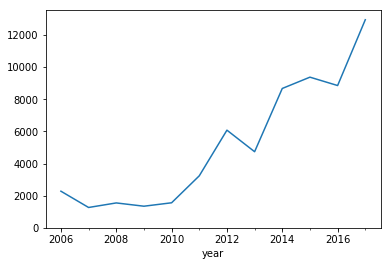

In [21]:
df.groupby('year')['Eingang_Erstanträge'].sum().plot()
plt.ylim(0)

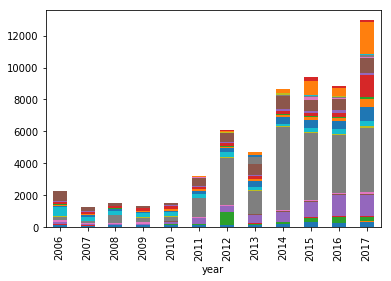

In [22]:
ax = df.groupby([df.year.dt.year, 'name'])['Eingang_Erstanträge'].sum().unstack().plot(kind='bar', stacked=True)
ax.legend().set_visible(False)

Chart({
  data:     Abhilfe  Abweisung  Antrag_zurückgenommen  \
  0       0.0        0.0                    NaN   
  1       0.0        0.0                    NaN   
  3       2.0        1.0                    NaN   
  4      26.0        2.0                    NaN   
  6       0.0        5.0                    NaN   
  7       0.0        0.0                    NaN   
  9       2.0        1.0                    NaN   
  10      2.0        1.0                    NaN   
  12      0.0        2.0                    NaN   
  13      0.0        0.0                    NaN   
  15      0.0        1.0                    NaN   
  16      4.0        7.0                    NaN   
  18      0.0        0.0                    NaN   
  19      3.0        2.0                    NaN   
  21      0.0        0.0                    NaN   
  22      0.0        0.0                    NaN   
  24      0.0        0.0                    NaN   
  25      0.0        0.0                    NaN   
  27      0.0    

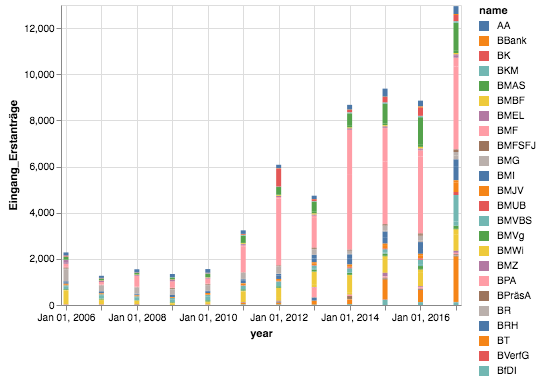

In [23]:
alt.Chart(df).mark_bar().encode(
    color='name',
    x='year',
    y='Eingang_Erstanträge',
    tooltip='name'
).interactive()

In [26]:
cols = ['Informationszugang_gewährt', 'Informationszugang_teilweise_gewährt', 'sonstige_Erledigung', 'Informationszugang_abgelehnt']

out_group = df.groupby(['name', 'year'])[cols].sum()

out_group['granted'] = out_group[['Informationszugang_gewährt', 'Informationszugang_teilweise_gewährt']].sum(1)
out_group['not_granted'] = out_group[['Informationszugang_abgelehnt', 'sonstige_Erledigung']].sum(1)
out_group['count'] = out_group['granted'] + out_group['not_granted']
out_group['transparency'] = out_group['granted'] / out_group['count'] * 100
out_group['transparency'] = out_group['transparency'].round()
out_group = out_group.reset_index()
out_group = out_group.drop(cols, axis=1)
out_group['year'] = pd.to_datetime(out_group['year']).dt.year
out_group.to_csv('data.csv', index=False)
out_group.head()

,name,year,granted,not_granted,count,transparency
0,AA,2006,81.0,37.0,118.0,69.0
1,AA,2007,56.0,28.0,84.0,67.0
2,AA,2008,94.0,32.0,126.0,75.0
3,AA,2009,98.0,35.0,133.0,74.0
4,AA,2010,102.0,46.0,148.0,69.0


Chart({
  data:       name      rate  granted  not_granted   count  transparency
  0       AA  0.829912    123.0        160.0   283.0          43.0
  1    BBank  0.973684     27.0         10.0    37.0          73.0
  2       BK  0.967626     38.0        231.0   269.0          14.0
  3      BKM  0.984375     47.0         16.0    63.0          75.0
  4     BMAS  1.011433   1150.0        177.0  1327.0          87.0
  5     BMBF  1.346154     35.0         35.0    70.0          50.0
  6     BMEL  0.777027     80.0         35.0   115.0          70.0
  7      BMF  0.948163   2841.0        927.0  3768.0          75.0
  8   BMFSFJ  0.947368     61.0         47.0   108.0          56.0
  9      BMG  0.926984    110.0        182.0   292.0          38.0
  10     BMI  0.991199    301.0        600.0   901.0          33.0
  11    BMJV  0.998031    117.0        390.0   507.0          23.0
  12    BMUB  1.000000     79.0         53.0   132.0          60.0
  13   BMVBS  0.991711    956.0        360.0  13

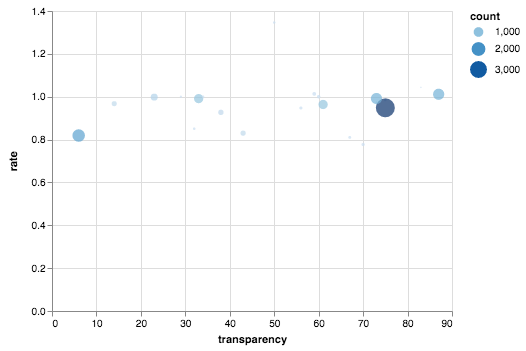

In [52]:
cols = [
    'Erledigungen_und_Bescheide', 'Eingang_Erstanträge',
    'Informationszugang_gewährt', 'Informationszugang_teilweise_gewährt',
    'sonstige_Erledigung', 'Informationszugang_abgelehnt'
]

out_group = df[df['year'].dt.year == 2017].groupby(['name'])[cols].sum()

out_group['rate'] = out_group['Erledigungen_und_Bescheide'] / out_group['Eingang_Erstanträge']

out_group['granted'] = out_group[['Informationszugang_gewährt', 'Informationszugang_teilweise_gewährt']].sum(1)
out_group['not_granted'] = out_group[['Informationszugang_abgelehnt', 'sonstige_Erledigung']].sum(1)
out_group['count'] = out_group['granted'] + out_group['not_granted']
out_group['transparency'] = out_group['granted'] / out_group['count'] * 100
out_group['transparency'] = out_group['transparency'].round()
out_group = out_group.reset_index()
out_group = out_group.drop(cols, axis=1)
out_group.head()


alt.Chart(out_group).mark_circle().encode(
    y='rate',
    x='transparency',
    size='count',
    color='count',
    tooltip='name'
).interactive()